In [1]:
import pandas as pd 
import geopandas as gpd
import urllib
import shapely
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data_g = gpd.read_file('data/prix-carburants-fichier-quotidien-test-ods.geojson')

In [3]:
data_g.columns

Index(['prix_valeur', 'rupture_nom', 'pop', 'dep_name', 'services_service',
       'rupture_debut', 'prix_maj', 'com_arm_name', 'adresse', 'horaires',
       'ville', 'rupture', 'reg_code', 'epci_name', 'com_arm_code', 'prix_nom',
       'cp', 'fermeture', 'horaires_automate_24_24', 'dep_code', 'epci_code',
       'reg_name', 'prix_id', 'id', 'geometry'],
      dtype='object')

In [4]:
def data_carb_g(df, carb):
    data_1 = df[['adresse', 'ville', 'prix_valeur', 'prix_nom', 'geometry']]
    d = data_1[data_1.prix_nom == carb]
    d.drop_duplicates(keep = 'first', inplace=True) 
    #df.drop_duplicates(subset ="'column'", keep = 'first', inplace=True) si on veut supprimer selon une colonne
    return d

In [5]:
data_2_g = data_carb_g(data_g, 'SP95').sort_values('prix_valeur')

In [6]:
data_2_g

,adresse,ville,prix_valeur,prix_nom,geometry
2402,Avenue de l'Orme à Martin,Courcouronnes,1.169,SP95,POINT (2.41700 48.63100)
60125,13 Avenue Ampère,MONTIGNY-LE-BRETONNEUX,1.423,SP95,POINT (2.04800 48.79800)
36655,754 route d'albertville,SEVRIER,1.499,SP95,POINT (6.14300 45.85600)
22911,Aire de Saint-Hilaire Cottes A26,SAINT-HILAIRE COTTES,1.499,SP95,POINT (2.39400 50.56600)
25102,ROUTE DE CHATEAU LAVALLIE,LA MEMBROLLE-SUR-CHOISILLE,1.506,SP95,POINT (0.62264 47.44276)
...,...,...,...,...,...
44978,"8,10,10bis Rue Bailleul",PARIS,2.240,SP95,POINT (2.34100 48.86100)
11148,15 Avenue Duquesne,PARIS,2.600,SP95,POINT (2.30800 48.85300)
43359,69 Avenue Kléber,Paris,2.690,SP95,POINT (2.28900 48.86500)
4049,253 Boulevard Raspail,PARIS,2.690,SP95,POINT (2.33100 48.83800)


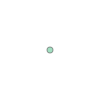

In [7]:
data_2_g.loc[58312, 'geometry']

In [8]:
data_2_g.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
from geopy.geocoders import Nominatim


def Adresse_to_gps(Adresse) : 

    geolocator = Nominatim(user_agent="Projet Python")
    location = geolocator.geocode(Adresse)
    return location.latitude, location.longitude


Adresse_to_gps("1 rue d'Arsonval, Orsay, France")

(48.7087952, 2.1742033)

In [23]:
point = shapely.geometry.Point(Adresse_to_gps("1 rue d'Arsonval, Orsay, France"))
col_adresse = gpd.GeoSeries((point for i in range(len(data_2_g))),index= data_2_g.index, crs = 4326)

In [24]:
col_adresse.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
data_2_g.distance(col_adresse)

C:\Users\hugol\AppData\Local\Temp\ipykernel_12112\689889311.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_2_g.distance(col_adresse)


2402     65.583262
60125    65.962173
36655    60.991362
22911    66.983776
25102    66.041809
           ...    
44978    65.799920
11148    65.817504
43359    65.839410
4049     65.790651
58312    65.770003
Length: 3709, dtype: float64